In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np

In [2]:
data = pd.read_csv('csvs/Clover_Bee_occurrence_data.csv')
bvt_data  = data[data['Collection method'] == 'vane trap'].reset_index(drop=True)
net_data  = data[data['Collection method'] == 'net'].reset_index(drop=True)

data['Collection method'].value_counts()

Collection method
vane trap    449
net          189
Name: count, dtype: int64

In [3]:
bvt_taxa = bvt_data[['Order ', 'Genus', 'Species', 'Sex', 'Caste']]
bvt_genus_counts = bvt_taxa['Genus'].value_counts()

In [4]:
bvt_bombus_counts = bvt_taxa[bvt_taxa['Genus'] == 'Bombus']['Species'].value_counts()

In [5]:
bvt_taxa[bvt_taxa['Genus'] == 'Bombus']

,Order,Genus,Species,Sex,Caste
0,Hymenoptera,Bombus,griseocollis,female,gyne
3,Hymenoptera,Bombus,vosnesenskii,female,worker
4,Hymenoptera,Bombus,vosnesenskii,female,worker
5,Hymenoptera,Bombus,vosnesenskii,male,drone
6,Hymenoptera,Bombus,vosnesenskii,female,worker
...,...,...,...,...,...
392,Hymenoptera,Bombus,vosnesenskii,male,drone
393,Hymenoptera,Bombus,vosnesenskii,female,worker
394,Hymenoptera,Bombus,vosnesenskii,female,worker
395,Hymenoptera,Bombus,fervidus,female,worker


In [20]:
bvt_taxa[bvt_taxa['Genus'] == 'Apis']

,Order,Genus,Species,Sex,Caste
96,Hymenoptera,Apis,mellifera,female,worker
158,Hymenoptera,Apis,mellifera,female,worker
320,Hymenoptera,Apis,mellifera,female,worker
322,Hymenoptera,Apis,mellifera,female,worker
323,Hymenoptera,Apis,mellifera,female,worker
324,Hymenoptera,Apis,mellifera,female,worker
325,Hymenoptera,Apis,mellifera,female,worker
326,Hymenoptera,Apis,mellifera,female,worker
349,Hymenoptera,Apis,mellifera,female,worker
352,Hymenoptera,Apis,mellifera,female,worker


In [6]:
# bvt_taxa[bvt_taxa['Genus'] == 'Osmia']['Species'].value_counts()

In [7]:
net_taxa = net_data[['Order ', 'Genus', 'Species', 'Sex', 'Caste']]
net_genus_counts = net_taxa['Genus'].value_counts()

In [8]:
net_taxa[net_taxa['Genus'] == 'Bombus']

,Order,Genus,Species,Sex,Caste
0,Hymenoptera,Bombus,fervidus,female,worker
1,Hymenoptera,Bombus,vosnesenskii,female,worker
2,Hymenoptera,Bombus,appositus,female,worker
3,Hymenoptera,Bombus,fervidus,female,worker
4,Hymenoptera,Bombus,fervidus,female,worker
...,...,...,...,...,...
184,Hymenoptera,Bombus,fervidus,female,worker
185,Hymenoptera,Bombus,vosnesenskii,male,drone
186,Hymenoptera,Bombus,vosnesenskii,male,drone
187,Hymenoptera,Bombus,vosnesenskii,male,drone


In [21]:
net_taxa[net_taxa['Genus'] == 'Apis']

,Order,Genus,Species,Sex,Caste
91,Hymenoptera,Apis,mellifera,female,worker
160,Hymenoptera,Apis,mellifera,female,worker
174,Hymenoptera,Apis,mellifera,female,worker


In [9]:

net_bombus_counts = net_taxa[net_taxa['Genus'] == 'Bombus']['Species'].value_counts()

In [10]:
# data[data['Genus'].isna()]

### RICHNESS

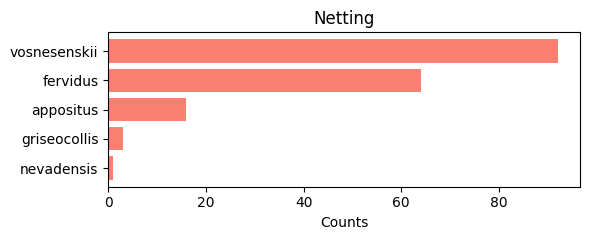

In [11]:
plt.figure(figsize=(6, 2.5))
plt.barh(net_bombus_counts.index[::-1], net_bombus_counts[::-1], color='salmon')
plt.xlabel('Counts')
plt.title('Netting')
plt.tight_layout()

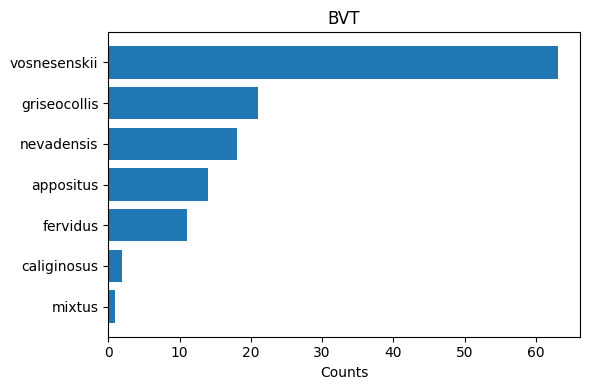

In [12]:
plt.figure(figsize=(6, 4))
plt.barh(bvt_bombus_counts.index[::-1], bvt_bombus_counts[::-1])
plt.xlabel('Counts')
plt.title('BVT')
plt.tight_layout()

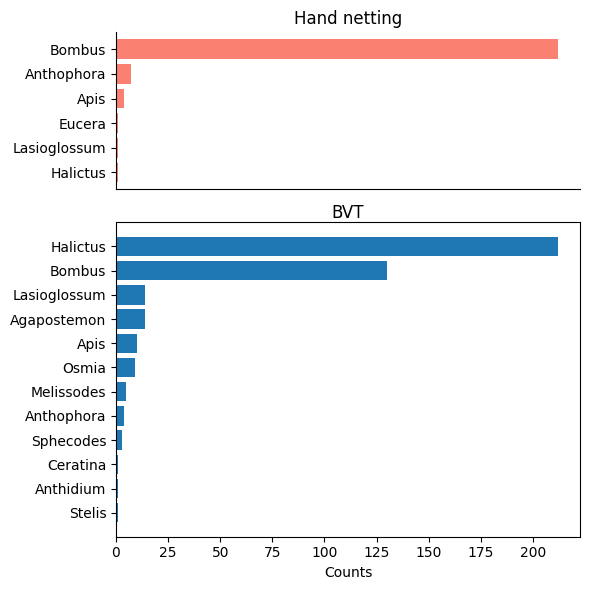

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [1, 2]}, constrained_layout=False)
ax1.barh(net_genus_counts.index[::-1], net_genus_counts[::-1], color='salmon')
ax1.set_title('Hand netting')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)  # Turn off bottom spine

ax1.set_xticks([]) 


ax2.barh(bvt_genus_counts.index[::-1], bvt_genus_counts[::-1])
ax2.set_xlabel('Counts')
ax2.set_title('BVT', pad=-10)
 

plt.tight_layout()
plt.savefig('figs/bvt_net_genera_counts.png', format='png', dpi=300)

In [14]:


print(f' BVT genus richness:{bvt_genus_counts.count()}\n',
      f'BVT Bombus richness:{bvt_bombus_counts.count()}\n',
      f'Net genus richness:{net_genus_counts.count()}\n',
      f'Net Bombus richness:{net_bombus_counts.count()}\n'
)

 BVT genus richness:12
 BVT Bombus richness:7
 Net genus richness:6
 Net Bombus richness:5



### SHANNON DIVERSITY (range 1.2 (low) to 2.5 (moderate to high))

In [15]:
bvt_genus_diversity = entropy(bvt_genus_counts / bvt_genus_counts.sum(), base=np.e)
bvt_bombus_diversity = entropy(bvt_bombus_counts / bvt_bombus_counts.sum(), base=np.e)
net_genus_diversity = entropy(net_genus_counts / net_genus_counts.sum(), base=np.e)
net_bombus_diversity = entropy(net_bombus_counts / net_bombus_counts.sum(), base=np.e)

print(f' BVT genus diversity: {bvt_genus_diversity}\n',
      f'BVT Bombus diversity: {bvt_bombus_diversity}\n',
      f'Net genus diversity: {net_genus_diversity}\n',
      f'Net Bombus diversity: {net_bombus_diversity}\n'
)

 BVT genus diversity: 1.2935969323731789
 BVT Bombus diversity: 1.4699260229670823
 Net genus diversity: 0.3212740010848035
 Net Bombus diversity: 1.0237207970530864



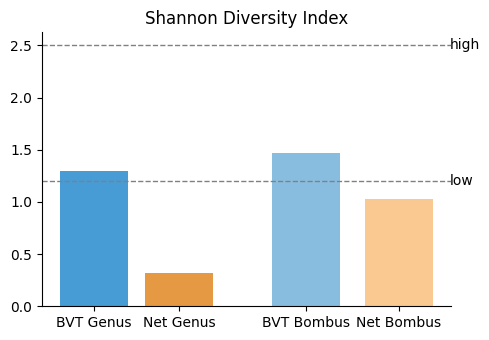

In [16]:
categories = ['BVT Genus',  'Net Genus','BVT Bombus', 'Net Bombus']

diversity_values = [bvt_genus_diversity, net_genus_diversity, bvt_bombus_diversity, net_bombus_diversity]

group_labels = ['BVT', 'Net']

plt.figure(figsize=(5, 3.5))

positions = [0, 1, 2.5, 3.6]
bars = plt.bar(positions, diversity_values, color=['#479cd6', '#e69943', '#89bde0', '#fac991'])

plt.xticks(positions, categories)

plt.title('Shannon Diversity Index')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=1.2, color='gray', linestyle='--', linewidth=1)
plt.text(x=4.2, y=1.2, s='low', verticalalignment='center')
plt.axhline(y=2.5, color='gray', linestyle='--', linewidth=1)
plt.text(x=4.2, y=2.5, s='high', verticalalignment='center')

plt.tight_layout()
plt.savefig('figs/bvt_net_shannon.png', format='png', dpi=300)

### SIMPSON DIVERSITY (0 (low) to 1 (high), emphasizes evenness by giving more weight to common species)

In [17]:
print(f' BVT genus diversity:{1 - np.sum((bvt_genus_counts/bvt_genus_counts.sum())**2)}\n',
      f'BVT Bombus diversity:{1 - np.sum((bvt_bombus_counts/bvt_bombus_counts.sum())**2)}\n',
      f'Net genus diversity:{1 - np.sum((net_genus_counts/net_genus_counts.sum())**2)}\n',
      f'Net Bombus diversity:{1 - np.sum((net_bombus_counts/net_bombus_counts.sum())**2)}\n'
)

 BVT genus diversity:0.6172556612096852
 BVT Bombus diversity:0.700828402366864
 Net genus diversity:0.1222272521502944
 Net Bombus diversity:0.5859375



In [18]:
bvt_genus_diversity = 1 - np.sum((bvt_genus_counts / bvt_genus_counts.sum()) ** 2)
bvt_bombus_diversity = 1 - np.sum((bvt_bombus_counts / bvt_bombus_counts.sum()) ** 2)
net_genus_diversity = 1 - np.sum((net_genus_counts / net_genus_counts.sum()) ** 2)
net_bombus_diversity = 1 - np.sum((net_bombus_counts / net_bombus_counts.sum()) ** 2)

diversity_values = [bvt_genus_diversity, net_genus_diversity,bvt_bombus_diversity , net_bombus_diversity]
categories = ['BVT Genus', 'Net Genus', 'BVT Bombus', 'Net Bombus']

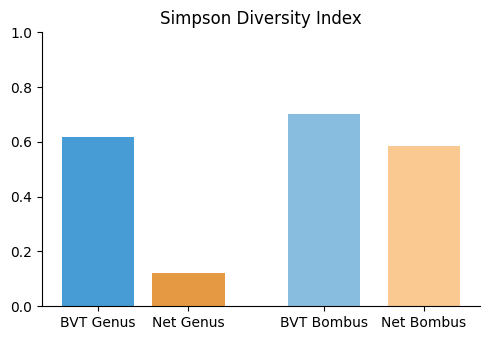

In [19]:

plt.figure(figsize=(5, 3.5))

positions = [0, 1, 2.5, 3.6]
bars = plt.bar(positions, diversity_values, color=['#479cd6', '#e69943', '#89bde0', '#fac991'])

plt.xticks(positions, categories)
plt.ylim(0, 1)
plt.title('Simpson Diversity Index')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('figs/bvt_net_simpsons.png', format='png', dpi=300)